In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CNN-SoftMax MODEL

In [ ]:
path_img = '/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100'

## READ THE DATASET

In [ ]:
from skimage.io import *
from numpy import *
from os import listdir

dataset = zeros((4200,100,100))
labels = zeros(4200)
i = 0
#print(i)
for folder in listdir(path_img):
  #print('Reading Folder',folder)
  for img in listdir(path_img+'/'+folder):
    I = imread(path_img+'/'+folder+'/'+img)
    dataset[i] = I/255
    labels[i] = int(folder)
    if (i+1)%100 == 0:
      print('Read '+str(i+1)+'th image')
    i = i+1
#print(i)

Read 100th image
Read 200th image
Read 300th image
Read 400th image
Read 500th image
Read 600th image
Read 700th image
Read 800th image
Read 900th image
Read 1000th image
Read 1100th image
Read 1200th image
Read 1300th image
Read 1400th image
Read 1500th image
Read 1600th image
Read 1700th image
Read 1800th image
Read 1900th image
Read 2000th image
Read 2100th image
Read 2200th image
Read 2300th image
Read 2400th image
Read 2500th image
Read 2600th image
Read 2700th image
Read 2800th image
Read 2900th image
Read 3000th image
Read 3100th image
Read 3200th image
Read 3300th image
Read 3400th image
Read 3500th image
Read 3600th image
Read 3700th image
Read 3800th image
Read 3900th image
Read 4000th image
Read 4100th image
Read 4200th image


In [ ]:
save(path_img+'/dataset_array.npy', dataset)
save(path_img+'/dataset_labels.npy', labels)

##LOAD THE SAVED DATASET

In [ ]:
from numpy import *

X = reshape(load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/dataset_array.npy'),(4200,100,100,1))
y = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/dataset_labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25, stratify = y_train)

In [ ]:
X_train = reshape(load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/X_train.npy'),(2520,100,100,1))
X_val = reshape(load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/X_val.npy'),(840,100,100,1))
X_test = reshape(load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/X_test.npy'),(840,100,100,1))

In [ ]:
y_train = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/y_train.npy')
y_val = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/y_val.npy')
y_test = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/y_test.npy')

In [ ]:
from sklearn.model_selection import StratifiedKFold

X_train = concatenate((X_train,X_val))
y_train = concatenate((y_train,y_val))

skf = StratifiedKFold(n_splits = 5)
A = skf.split(X_train, y_train)

In [ ]:
X_train.shape

(3360, 100, 100, 1)

In [ ]:
train_index = []
test_index = []
for tr, te in A:
  train_index.append(tr)
  test_index.append(te)

In [ ]:
train_index[0].shape

(2688,)

In [ ]:
save(path_img+'/Trainin_Validation_Folds_train.npy', array(train_index))
save(path_img+'/Trainin_Validation_Folds_val.npy', array(test_index))

In [ ]:
train_index = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/Trainin_Validation_Folds_train.npy')
test_index = load('/content/drive/MyDrive/Mini Project Semester 6/Resized Dataset 100x100/Trainin_Validation_Folds_val.npy')

In [ ]:
train_index.shape

(5, 2688)

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100,100,1), padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Fold 1**

In [ ]:
F1model = models.clone_model(model)
F1model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = F1model.fit(X_train[train_index[0]], y_train[train_index[0]], epochs=40, validation_data=(X_train[test_index[0]], y_train[test_index[0]]))

Epoch 1/40
84/84 [==============================] - 2s 13ms/step - loss: 1.8060 - accuracy: 0.1731 - val_loss: 1.7906 - val_accuracy: 0.1711
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7890 - accuracy: 0.1884 - val_loss: 1.7133 - val_accuracy: 0.2827
Epoch 3/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7620 - accuracy: 0.2311 - val_loss: 1.6761 - val_accuracy: 0.3214
Epoch 4/40
84/84 [==============================] - 1s 10ms/step - loss: 1.5819 - accuracy: 0.3489 - val_loss: 1.3978 - val_accuracy: 0.4688
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.3912 - accuracy: 0.4490 - val_loss: 1.2723 - val_accuracy: 0.5238
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 1.1548 - accuracy: 0.5682 - val_loss: 1.0973 - val_accuracy: 0.5699
Epoch 7/40
84/84 [==============================] - 1s 10ms/step - loss: 0.9350 - accuracy: 0.6640 - val_loss: 0.9071 - val_accuracy: 0.6637
Epoch 8/40
84

In [ ]:
results = F1model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.4118 - accuracy: 0.8917


**Fold 2**

In [ ]:
F2model = models.clone_model(model)
F2model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = F2model.fit(X_train[train_index[1]], y_train[train_index[1]], epochs=40, validation_data=(X_train[test_index[1]], y_train[test_index[1]]))

Epoch 1/40
84/84 [==============================] - 2s 13ms/step - loss: 1.8022 - accuracy: 0.1728 - val_loss: 1.7895 - val_accuracy: 0.1711
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7740 - accuracy: 0.2287 - val_loss: 1.7454 - val_accuracy: 0.2232
Epoch 3/40
84/84 [==============================] - 1s 10ms/step - loss: 1.6336 - accuracy: 0.3354 - val_loss: 1.4769 - val_accuracy: 0.4717
Epoch 4/40
84/84 [==============================] - 1s 10ms/step - loss: 1.4231 - accuracy: 0.4542 - val_loss: 1.2312 - val_accuracy: 0.5387
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.1383 - accuracy: 0.5781 - val_loss: 1.0761 - val_accuracy: 0.6146
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 0.9548 - accuracy: 0.6579 - val_loss: 0.9522 - val_accuracy: 0.6771
Epoch 7/40
84/84 [==============================] - 1s 10ms/step - loss: 0.8577 - accuracy: 0.6893 - val_loss: 0.7706 - val_accuracy: 0.7247
Epoch 8/40
84

In [ ]:
results = F2model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.4066 - accuracy: 0.8988


**Fold 3**

In [ ]:
F3model = models.clone_model(model)
F3model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = F3model.fit(X_train[train_index[2]], y_train[train_index[2]], epochs=40, validation_data=(X_train[test_index[2]], y_train[test_index[2]]))

Epoch 1/40
84/84 [==============================] - 2s 12ms/step - loss: 1.8040 - accuracy: 0.1677 - val_loss: 1.7842 - val_accuracy: 0.2098
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7586 - accuracy: 0.2327 - val_loss: 1.7007 - val_accuracy: 0.3021
Epoch 3/40
84/84 [==============================] - 1s 10ms/step - loss: 1.5765 - accuracy: 0.3564 - val_loss: 1.3956 - val_accuracy: 0.4792
Epoch 4/40
84/84 [==============================] - 1s 10ms/step - loss: 1.3760 - accuracy: 0.4673 - val_loss: 1.1505 - val_accuracy: 0.5952
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.1397 - accuracy: 0.5723 - val_loss: 0.8876 - val_accuracy: 0.6696
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 0.9618 - accuracy: 0.6384 - val_loss: 0.7696 - val_accuracy: 0.7202
Epoch 7/40
84/84 [==============================] - 1s 10ms/step - loss: 0.7677 - accuracy: 0.7071 - val_loss: 0.6939 - val_accuracy: 0.7634
Epoch 8/40
84

In [ ]:
results = F3model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.4264 - accuracy: 0.8917


**Fold 4**

In [ ]:
F4model = models.clone_model(model)
F4model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = F4model.fit(X_train[train_index[3]], y_train[train_index[3]], epochs=40, validation_data=(X_train[test_index[3]], y_train[test_index[3]]))

Epoch 1/40
84/84 [==============================] - 2s 13ms/step - loss: 1.7963 - accuracy: 0.1662 - val_loss: 1.7849 - val_accuracy: 0.1652
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7657 - accuracy: 0.2307 - val_loss: 1.5795 - val_accuracy: 0.3482
Epoch 3/40
84/84 [==============================] - 1s 10ms/step - loss: 1.5460 - accuracy: 0.4008 - val_loss: 1.3684 - val_accuracy: 0.4955
Epoch 4/40
84/84 [==============================] - 1s 10ms/step - loss: 1.3131 - accuracy: 0.4934 - val_loss: 1.1154 - val_accuracy: 0.5655
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.0467 - accuracy: 0.6108 - val_loss: 1.0202 - val_accuracy: 0.6220
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 0.9117 - accuracy: 0.6571 - val_loss: 0.9287 - val_accuracy: 0.6622
Epoch 7/40
84/84 [==============================] - 1s 10ms/step - loss: 0.8475 - accuracy: 0.6905 - val_loss: 0.7841 - val_accuracy: 0.7113
Epoch 8/40
84

In [ ]:
results = F4model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.3867 - accuracy: 0.9036


**Fold 5**

In [ ]:
F5model = models.clone_model(model)
F5model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = F5model.fit(X_train[train_index[4]], y_train[train_index[4]], epochs=40, validation_data=(X_train[test_index[4]], y_train[test_index[4]]))

Epoch 1/40
84/84 [==============================] - 2s 12ms/step - loss: 1.8091 - accuracy: 0.1783 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7834 - accuracy: 0.1994 - val_loss: 1.7546 - val_accuracy: 0.2426
Epoch 3/40
84/84 [==============================] - 1s 10ms/step - loss: 1.7146 - accuracy: 0.2640 - val_loss: 1.6826 - val_accuracy: 0.2783
Epoch 4/40
84/84 [==============================] - 1s 10ms/step - loss: 1.5173 - accuracy: 0.3888 - val_loss: 1.4228 - val_accuracy: 0.4256
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.2465 - accuracy: 0.5117 - val_loss: 1.1734 - val_accuracy: 0.5670
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 1.0508 - accuracy: 0.6047 - val_loss: 0.9251 - val_accuracy: 0.6875
Epoch 7/40
84/84 [==============================] - 1s 10ms/step - loss: 0.8411 - accuracy: 0.6928 - val_loss: 0.8602 - val_accuracy: 0.6935
Epoch 8/40
84

In [ ]:
results = F5model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.4024 - accuracy: 0.8857


In [ ]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
79/79 [==============================] - 2s 14ms/step - loss: 1.7986 - accuracy: 0.1699 - val_loss: 1.7850 - val_accuracy: 0.2250
Epoch 2/40
79/79 [==============================] - 1s 11ms/step - loss: 1.7394 - accuracy: 0.2801 - val_loss: 1.7210 - val_accuracy: 0.2536
Epoch 3/40
79/79 [==============================] - 1s 11ms/step - loss: 1.5338 - accuracy: 0.3934 - val_loss: 1.4851 - val_accuracy: 0.3893
Epoch 4/40
79/79 [==============================] - 1s 11ms/step - loss: 1.3092 - accuracy: 0.4964 - val_loss: 1.2235 - val_accuracy: 0.5488
Epoch 5/40
79/79 [==============================] - 1s 11ms/step - loss: 1.1151 - accuracy: 0.5652 - val_loss: 1.0300 - val_accuracy: 0.6440
Epoch 6/40
79/79 [==============================] - 1s 11ms/step - loss: 0.9756 - accuracy: 0.6283 - val_loss: 0.8884 - val_accuracy: 0.6976
Epoch 7/40
79/79 [==============================] - 1s 11ms/step - loss: 0.8141 - accuracy: 0.6877 - val_loss: 0.8800 - val_accuracy: 0.6690
Epoch 8/40
79

In [ ]:
results = model.evaluate(X_test,  y_test, verbose=2)

27/27 - 0s - loss: 0.3622 - accuracy: 0.9202


## Save The Model

In [ ]:
model.save(path_img+'/BestModel.h5')
save(path_img+'/X_train.npy', X_train)
save(path_img+'/y_train.npy', y_train)
save(path_img+'/X_val.npy', X_val)
save(path_img+'/y_val.npy', y_val)
save(path_img+'/X_test.npy', X_test)
save(path_img+'/y_test.npy', y_test)

## Plot The Training Phase

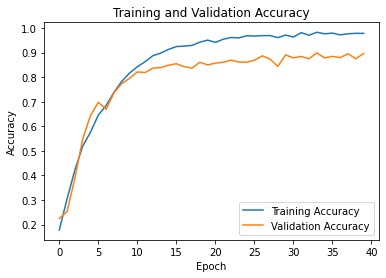

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig(path_img+'/Accuracy.jpg', dpi=1200)

In [ ]:
class_labels = {0: 'Cut Shot', 1: 'Cover Drive', 2: 'Straight Drive', 3: 'Pull Shot', 4: 'Leg Glance', 5: 'Scoop Shot'}

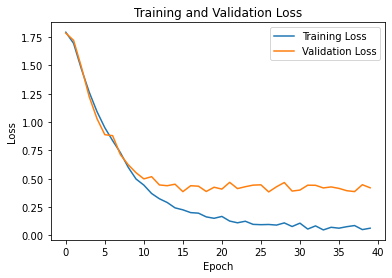

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig(path_img+'/Loss.jpg', dpi=1200)

## Make Prediction

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

y_pred = argmax(model.predict(X_test),axis = 1)

In [ ]:
cr = classification_report(y_test,y_pred, target_names = [class_labels[i] for i in class_labels],output_dict = True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Cut Shot,0.894366,0.907143,0.900709,140.000000
Cover Drive,0.913669,0.907143,0.910394,140.000000
Straight Drive,0.885135,0.935714,0.909722,140.000000
Pull Shot,0.935714,0.935714,0.935714,140.000000
Leg Glance,0.962406,0.914286,0.937729,140.000000
Scoop Shot,0.934783,0.921429,0.928058,140.000000
accuracy,0.920238,0.920238,0.920238,0.920238
macro avg,0.921012,0.920238,0.920388,840.000000
weighted avg,0.921012,0.920238,0.920388,840.000000


In [ ]:
accuracy_score(y_test,y_pred)

0.9202380952380952

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
import pandas as pd

cmdf = pd.DataFrame(cm)
cmdf.columns = [class_labels[i] for i in cmdf.columns]
cmdf.index = [class_labels[i] for i in cmdf.index]
cmdf

,Cut Shot,Cover Drive,Straight Drive,Pull Shot,Leg Glance,Scoop Shot
Cut Shot,127,4,5,2,1,1
Cover Drive,5,127,4,1,0,3
Straight Drive,2,3,131,2,1,1
Pull Shot,2,2,2,131,0,3
Leg Glance,1,3,4,3,128,1
Scoop Shot,5,0,2,1,3,129


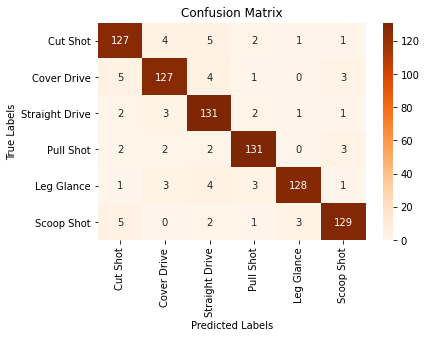

In [ ]:
import seaborn as sns

sns.heatmap(cmdf,annot=True,cmap='Oranges', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(path_img+'/Confusion Matrix.jpg', dpi=1200,bbox_inches ="tight")
plt.show()

In [ ]:
cmn = cm/cm.astype(float).sum(axis=1)

In [ ]:
import pandas as pd

cmndf = pd.DataFrame(cmn)
cmndf.columns = [class_labels[i] for i in cmndf.columns]
cmndf.index = [class_labels[i] for i in cmndf.index]
cmndf

,Cut Shot,Cover Drive,Straight Drive,Pull Shot,Leg Glance,Scoop Shot
Cut Shot,0.907143,0.028571,0.035714,0.014286,0.007143,0.007143
Cover Drive,0.035714,0.907143,0.028571,0.007143,0.000000,0.021429
Straight Drive,0.014286,0.021429,0.935714,0.014286,0.007143,0.007143
Pull Shot,0.014286,0.014286,0.014286,0.935714,0.000000,0.021429
Leg Glance,0.007143,0.021429,0.028571,0.021429,0.914286,0.007143
Scoop Shot,0.035714,0.000000,0.014286,0.007143,0.021429,0.921429


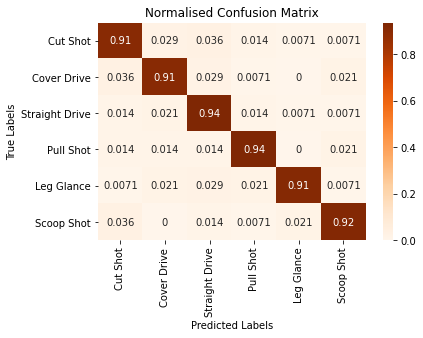

In [ ]:
import seaborn as sns

sns.heatmap(cmndf,annot=True,cmap='Oranges', fmt='.2g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalised Confusion Matrix')
plt.savefig(path_img+'/Normalised Confusion Matrix.jpg', dpi=1200,bbox_inches ="tight")
plt.show()

## Load Pre-Trained Model remove output layer and Train SVM on extracted features

In [ ]:
m1 = keras.models.load_model(path_img+'/BestModel.h5')
res = m1.evaluate(X_test, y_test)

27/27 [==============================] - 0s 6ms/step - loss: 0.3622 - accuracy: 0.9202


In [ ]:
m1.pop()

features_train = m1.predict(X_train)
features_test = m1.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

suppvm = SVC()
suppvm.fit(features_train, y_train)
y_pred1 = suppvm.predict(features_test)

## Classification Reports

In [ ]:
accuracy_score(y_test,y_pred1)

0.9130952380952381

In [ ]:
crs = classification_report(y_test,y_pred1, target_names = [class_labels[i] for i in class_labels],output_dict = True)
pd.DataFrame(crs).T

,precision,recall,f1-score,support
Cut Shot,0.912409,0.892857,0.902527,140.000000
Cover Drive,0.863946,0.907143,0.885017,140.000000
Straight Drive,0.919708,0.900000,0.909747,140.000000
Pull Shot,0.910959,0.950000,0.930070,140.000000
Leg Glance,0.961538,0.892857,0.925926,140.000000
Scoop Shot,0.916084,0.935714,0.925795,140.000000
accuracy,0.913095,0.913095,0.913095,0.913095
macro avg,0.914107,0.913095,0.913180,840.000000
weighted avg,0.914107,0.913095,0.913180,840.000000


In [ ]:
cms = confusion_matrix(y_test,y_pred1)

In [ ]:
import pandas as pd

cmsdf = pd.DataFrame(cms)
cmsdf.columns = [class_labels[i] for i in cmsdf.columns]
cmsdf.index = [class_labels[i] for i in cmsdf.index]
cmsdf

,Cut Shot,Cover Drive,Straight Drive,Pull Shot,Leg Glance,Scoop Shot
Cut Shot,125,6,3,4,1,1
Cover Drive,4,127,3,1,0,5
Straight Drive,2,5,126,5,1,1
Pull Shot,0,2,1,133,0,4
Leg Glance,1,7,4,2,125,1
Scoop Shot,5,0,0,1,3,131


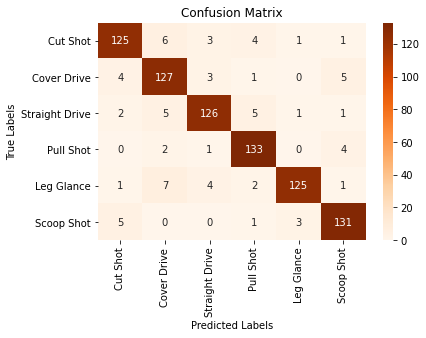

In [ ]:
import seaborn as sns

sns.heatmap(cmsdf,annot=True,cmap='Oranges', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(path_img+'/Confusion Matrix SVM.jpg', dpi=1200,bbox_inches ="tight")
plt.show()

In [ ]:
cmns = cms/cms.astype(float).sum(axis=1)

In [ ]:
import pandas as pd

cmnsdf = pd.DataFrame(cmns)
cmnsdf.columns = [class_labels[i] for i in cmnsdf.columns]
cmnsdf.index = [class_labels[i] for i in cmnsdf.index]
cmnsdf

,Cut Shot,Cover Drive,Straight Drive,Pull Shot,Leg Glance,Scoop Shot
Cut Shot,0.892857,0.042857,0.021429,0.028571,0.007143,0.007143
Cover Drive,0.028571,0.907143,0.021429,0.007143,0.000000,0.035714
Straight Drive,0.014286,0.035714,0.900000,0.035714,0.007143,0.007143
Pull Shot,0.000000,0.014286,0.007143,0.950000,0.000000,0.028571
Leg Glance,0.007143,0.050000,0.028571,0.014286,0.892857,0.007143
Scoop Shot,0.035714,0.000000,0.000000,0.007143,0.021429,0.935714


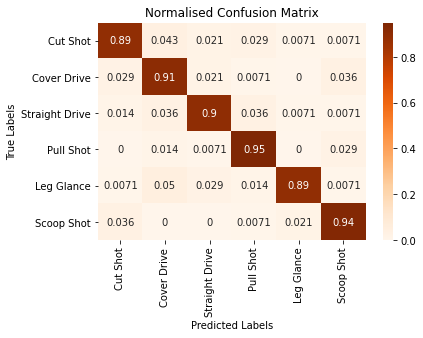

In [ ]:
import seaborn as sns

sns.heatmap(cmnsdf,annot=True,cmap='Oranges', fmt='.2g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalised Confusion Matrix')
plt.savefig(path_img+'/Normalised Confusion Matrix SVM.jpg', dpi=1200,bbox_inches ="tight")
plt.show()